In [9]:
import numpy as np 
import math

from sklearn.datasets import fetch_openml

In [10]:
import numpy as np 
import math
from sklearn.datasets import fetch_openml

def relu(X):
    return np.maximum(X, 0)

def relu_derivative(X):
    return 1. * (X > 0)

def build_model(X,hidden_nodes,output_dim=2):
    model = {}
    input_dim = X.shape[1]
    model['W1'] = np.random.randn(input_dim, hidden_nodes) / np.sqrt(input_dim)
    model['b1'] = np.zeros((1, hidden_nodes))
    model['W2'] = np.random.randn(hidden_nodes, hidden_nodes) / np.sqrt(hidden_nodes)
    model['b2'] = np.zeros((1, hidden_nodes))
    model['W3'] = np.random.randn(hidden_nodes, output_dim) / np.sqrt(hidden_nodes)
    model['b3'] = np.zeros((1, output_dim))
    return model

def feed_forward(model, x):
    W1, b1, W2, b2, W3, b3 = model['W1'], model['b1'], model['W2'], model['b2'], model['W3'], model['b3']
    # Forward propagation
    z1 = x.dot(W1) + b1
    #a1 = np.tanh(z1)
    a1 = relu(z1)
    z2 = a1.dot(W2) + b2
    a2 = relu(z2)
    z3 = a2.dot(W3) + b3
    exp_scores = np.exp(z3)
    out = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return z1, a1, z2, a2, z3, out

def calculate_loss(model,X,y,reg_lambda):
    num_examples = X.shape[0]
    W1, b1, W2, b2, W3, b3 = model['W1'], model['b1'], model['W2'], model['b2'], model['W3'], model['b3']
    # Forward propagation to calculate our predictions
    z1, a1, z2, a2, z3, out = feed_forward(model, X)
    probs = out / np.sum(out, axis=1, keepdims=True)
    # Calculating the loss
    corect_logprobs = -np.log(probs[range(num_examples), y])
    loss = np.sum(corect_logprobs)
    # Add regulatization term to loss (optional)
    loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)) + np.sum(np.square(W3)))
    return 1./num_examples * loss

def backprop(X,y,model,z1,a1,z2,a2,z3,output,reg_lambda):
    delta3 = output
    delta3[range(X.shape[0]), y] -= 1  #yhat - y
    dW3 = (a2.T).dot(delta3)
    db3 = np.sum(delta3, axis=0, keepdims=True)
    delta2 = delta3.dot(model['W3'].T) * relu_derivative(a2) #if ReLU
    dW2 = np.dot(a1.T, delta2)
    db2 = np.sum(delta2, axis=0)
    #delta2 = delta3.dot(model['W2'].T) * (1 - np.power(a1, 2)) #if tanh
    delta1 = delta2.dot(model['W2'].T) * relu_derivative(a1) #if ReLU
    dW1 = np.dot(X.T, delta1)
    db1 = np.sum(delta1, axis=0)
    # Add regularization terms
    dW3 += reg_lambda * model['W3']
    dW2 += reg_lambda * model['W2']
    dW1 += reg_lambda * model['W1']
    return dW1, dW2, dW3, db1, db2, db3


def train(model, X, y, num_passes=10000, reg_lambda = .1, learning_rate=0.1):
    # Batch gradient descent
    done = False
    previous_loss = float('inf')
    i = 0
    losses = []
    while done == False:  #comment out while performance testing
    #while i < 1500:
        #feed forward
        z1,a1,z2,a2,z3,output = feed_forward(model, X)
        #backpropagation
        dW1, dW2, dW3, db1, db2, db3 = backprop(X,y,model,z1,a1,z2,a2,z3,output,reg_lambda)
        #update weights and biases
        model['W1'] -= learning_rate * dW1
        model['b1'] -= learning_rate * db1
        model['W2'] -= learning_rate * dW2
        model['b2'] -= learning_rate * db2
        model['W3'] -= learning_rate * dW3
        model['b3'] -= learning_rate * db3
        if i % 1000 == 0:
            loss = calculate_loss(model, X, y, reg_lambda)
            losses.append(loss)
            print "Loss after iteration %i: %f" %(i, loss)  #uncomment once testing finished, return mod val to 1000
            if (previous_loss-loss)/previous_loss < 0.01:
                done = True
                #print i
            previous_loss = loss
        i += 1
    return model, losses





In [13]:
#toy dataset
from mnist import MNIST

mndata = MNIST('samples')

X, y = mndata.load_training()
# or
images, labels = mndata.load_testing()

num_examples = len(X) # training set size
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality 
learning_rate = 0.01 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength
model = build_model(X,20,2)
model, losses = train(model,X, y, reg_lambda=reg_lambda, learning_rate=learning_rate)
output = feed_forward(model, X)
preds = np.argmax(output[3], axis=1)

IOError: [Errno 2] No such file or directory: 'samples/train-labels-idx1-ubyte'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

ImportError: No module named google.protobuf

In [2]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  12  56 140 126 175 200  96   2
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  35 166 238 254 246 242 253 246 254  67
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 184 182 146 127  70  30  45  36 215 175
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30   0   0   0   0   0   0   0 207 246
   14   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  5

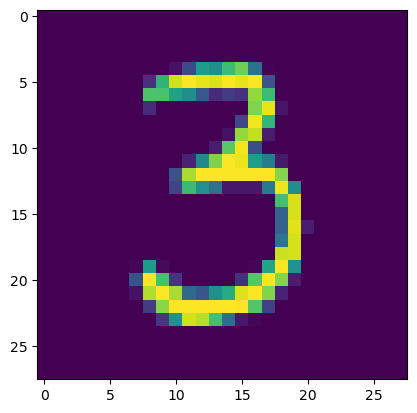

In [4]:
plt.imshow(train_X[50])
plt.show()

In [7]:
rand=np.arange(60000)
np.random.shuffle(rand)
train_no=rand[:50000]

val_no=np.setdiff1d(rand,train_no)

X_train,X_val = train_X[train_no,:,:], train_X[val_no,:,:]
Y_train,Y_val = train_y[train_no], train_y[val_no]

In [8]:
def init(x,y):
    
    layer=np.random.uniform(-1.,1.,size=(x,y))/np.sqrt(x*y)
    return layer.astype(np.float32)

np.random.seed(42)
l1=init(28*28,128)
l2=init(128,10)

In [9]:
#Sigmoid funstion
def sigmoid(x):
    return 1/(np.exp(-x)+1)    

#derivative of sigmoid
def d_sigmoid(x):
    return (np.exp(-x))/((np.exp(-x)+1)**2)

In [10]:
#def softmax(x):
#    exponents=np.exp(x)
#    return exponents/np.sum(exponents)

In [12]:
#Softmax
def softmax(x):
    exp_element=np.exp(x-x.max())
    return exp_element/np.sum(exp_element,axis=0)

#derivative of softmax
def d_softmax(x):
    exp_element=np.exp(x-x.max())
    return exp_element/np.sum(exp_element,axis=0)*(1-exp_element/np.sum(exp_element,axis=0))

In [13]:
#forward and backward pass
def forward_backward_pass(x,y):
    targets = np.zeros((len(y),10), np.float32)
    targets[range(targets.shape[0]),y] = 1
 
    
    x_l1=x.dot(l1)
    x_sigmoid=sigmoid(x_l1)
    x_l2=x_sigmoid.dot(l2)
    out=softmax(x_l2)
   
 
    error=2*(out-targets)/out.shape[0]*d_softmax(x_l2)
    update_l2=x_sigmoid.T@error
    
    
    error=((l2).dot(error.T)).T*d_sigmoid(x_l1)
    update_l1=x.T@error

    return out,update_l1,update_l2 

In [17]:
epochs = 300
lr = 0.01
batch = 128

losses,accuracies,val_accuracies=[],[],[]

for i in range(epochs):
    sample=np.random.randint(0,X_train.shape[0],size=(batch))
    x=X_train[sample].reshape((-1,28*28))
    y=Y_train[sample]
 

    out,update_l1,update_l2=forward_backward_pass(x,y)
  
    category=np.argmax(out,axis=1)
    accuracy=(category==y).mean()
    accuracies.append(accuracy)
    
    loss=((category-y)**2).mean()
    losses.append(loss.item())
    
    l1=l1-lr*update_l1
    l2=l2-lr*update_l2
    
    if(i%2==0):    
        X_val=X_val.reshape((-1,28*28))
        val_out=np.argmax(softmax(sigmoid(X_val.dot(l1)).dot(l2)),axis=1)
        val_acc=(val_out==Y_val).mean()
        val_accuracies.append(val_acc.item())
    if(i%10==0): print(f'For {i}th epoch: train accuracy: {accuracy:.3f} | validation accuracy:{val_acc:.3f}')

For 0th epoch: train accuracy: 0.266 | validation accuracy:0.305
For 10th epoch: train accuracy: 0.445 | validation accuracy:0.475
For 20th epoch: train accuracy: 0.609 | validation accuracy:0.571
For 30th epoch: train accuracy: 0.633 | validation accuracy:0.633
For 40th epoch: train accuracy: 0.641 | validation accuracy:0.676
For 50th epoch: train accuracy: 0.664 | validation accuracy:0.701
For 60th epoch: train accuracy: 0.703 | validation accuracy:0.719
For 70th epoch: train accuracy: 0.758 | validation accuracy:0.730
For 80th epoch: train accuracy: 0.750 | validation accuracy:0.742
For 90th epoch: train accuracy: 0.766 | validation accuracy:0.755
For 100th epoch: train accuracy: 0.758 | validation accuracy:0.757
For 110th epoch: train accuracy: 0.766 | validation accuracy:0.763
For 120th epoch: train accuracy: 0.773 | validation accuracy:0.771
For 130th epoch: train accuracy: 0.750 | validation accuracy:0.776
For 140th epoch: train accuracy: 0.789 | validation accuracy:0.782
For 15